In [1]:
import numpy as np
import os
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import albumentations as amt

In [2]:
def data_loader(data_path, is_test=False):
    """
    Return loaded images. I didn`t do the DataGenerator as we had quite a few images.
    """
    if is_test:
        dataset = 'test'
    else:
        dataset
    image_names = os.listdir(os.path.join(data_path, '{}_x'.format(dataset)))
    X = []
    y = []
    for i in range(len(image_names)):
        for i in range(len(test_name_images)):
            X_test.append(cv.imread(os.path.join(data_path, '{}_x'.format(dataset), image_names[i])))
            y_test.append(cv.imread(os.path.join(data_path, '{}_y'.format(dataset), image_names[i]))) 

    return X, y


def plot_big(img):
    plt.figure(figsize=(10,10))
    plt.axis('Off')
    plt.imshow(img)
    
def plot_one_channel(img, num_channel):
    plt.figure(figsize=(10,10))
    plt.axis('Off')
    plt.imshow(img[:,:,num_channel])
    
def plot_channels_row(img):
    plt.figure(figsize=(20,20))
    labels = ['Artefacts','Lumen', 'Tissue']
    colormaps = ['Reds', 'Greens', 'Blues']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.axis("Off")
        plt.title(labels[i], fontweight='bold', fontsize=25)
        plt.imshow(img[:,:,i], cmap=colormaps[i])

def plot_img_mask_pair(img, mask):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.axis('Off')
    plt.title("Image", fontsize=30,fontweight='bold')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.axis("Off")
    plt.title("Mask", fontsize=30,fontweight='bold')
    plt.imshow(mask.astype(int))

def plot_merged_img_mask(img, mask, merging_intensity=0.5):
    mask[mask>0] = 255
    merged = cv.addWeighted(img, 1, mask, merging_intensity, 0)
    plot_big(merged)
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img.astype(np.uint8)

# Data Reading

In [4]:
# x_path = '/home/bohdan/ultrasound/dataset/preprocessed_data/train_x/'
x_path = '/home/bohdan/ultrasound/dataset/augmentation/rgb_all_types_of_aug/train_x/'
x_names = os.listdir(x_path)
train_x = [cv.imread(x_path+x_names[i]) for i in range(len(x_names))]

# y_path = '/home/bohdan/ultrasound/dataset/preprocessed_data/train_y/'
y_path = '/home/bohdan/ultrasound/dataset/augmentation/rgb_all_types_of_aug/train_y/'
y_names = os.listdir(y_path)
train_y = [cv.imread(y_path+x_names[i]) for i in range(len(x_names))]

FileNotFoundError: [Errno 2] No such file or directory: '/home/bohdan/ultrasound/dataset/augmentation/rgb_all_types_of_aug/train_x/'

In [ ]:
for i in range(len(train_y)):
    values, counts = np.unique(train_y[i],return_counts=True)
    print("Min: ",train_y[i].min())
    print("Max: ",train_y[i].max())
    print("Unique values: ", dict(zip(values, counts)))
    print()

In [ ]:
# for i in range(len(train_y)-250):
#     plot_img_mask_pair(train_x[i], train_y[i])
#     plot_channels_row(train_y[i])

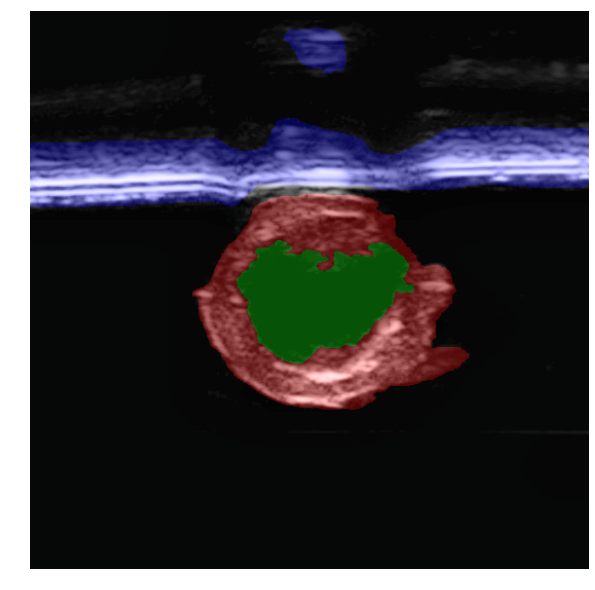

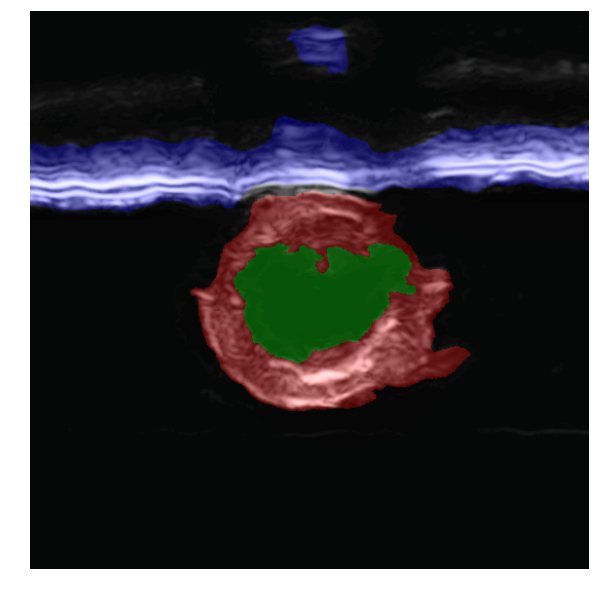

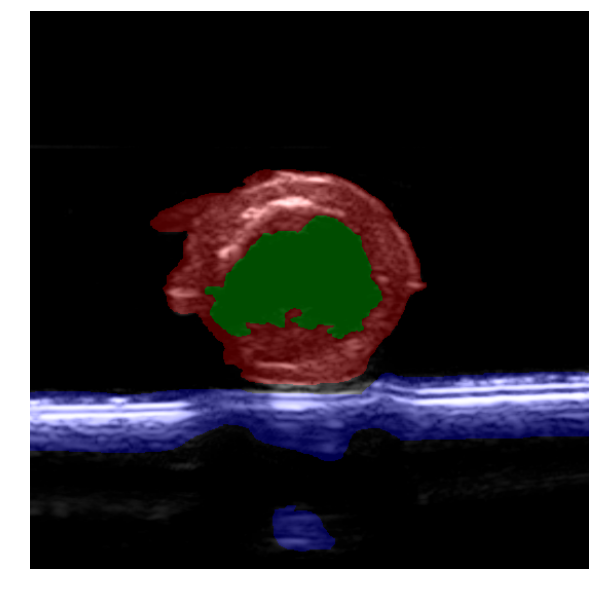

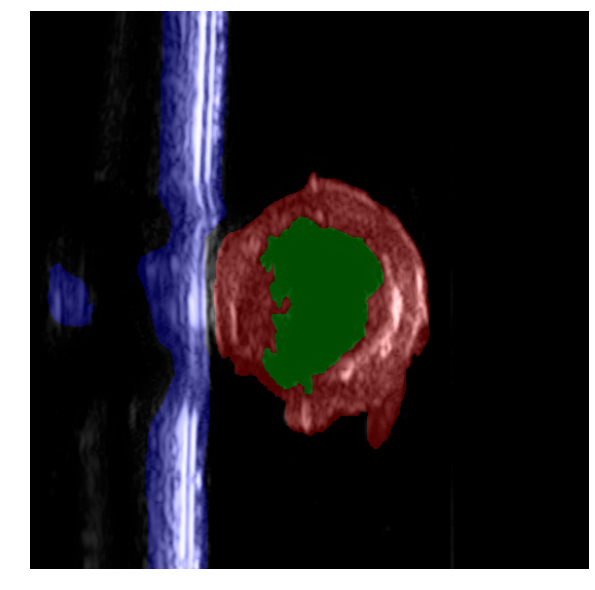

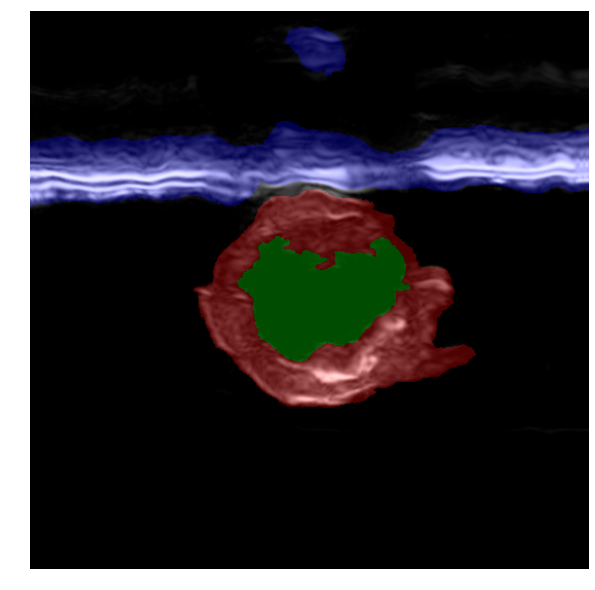

In [127]:
for i in range(len(train_x) - 270):
    plot_merged_img_mask(train_x[i], train_y[i], 0.3)

In [49]:
def checkRGB(pixel_values):
    if np.count_nonzero(pixel_values) == 1 or np.count_nonzero(pixel_values) == 0:
        return True
    return False

# .npy investigation

In [16]:
y_path = '/home/bohdan/ultrasound/dataset/augmentation/softmax/rgb_color_non_destructive_aug/train_y/'
x_path = '/home/bohdan/ultrasound/dataset/augmentation/softmax/rgb_color_non_destructive_aug/train_x/'
y_list = os.listdir(y_path)
x_list = os.listdir(x_path)
y = [np.load(y_path+i) for i in y_list[:5]]
x = [cv.imread(x_path+i) for i in x_list[:5]]

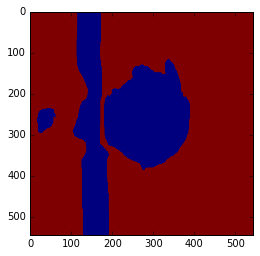

In [19]:
plt.imshow(y[4][:,:,3])

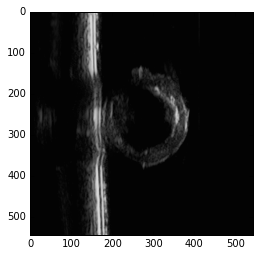

In [20]:
plt.imshow(x[4])